# Description of the Agentic Parallelization Workflow

## 🧠 What is an Agentic Parallelization Workflow?

*  It’s one of the most powerful (yet underused) ways to scale LLM capabilities.

*  In simple terms, parallelization means you let your AI model handle multiple tasks at once, then you aggregate the results programmatically.


---



## 🔑 Two Powerful Modes of Parallelization:

There are two core strategies you can use:

### 🔹 Sectioning:
Break the main task into smaller, independent subtasks — and process them in parallel.
(Perfect for analyzing different angles of the same problem.)

### 🔹 Voting:
Run the same prompt multiple times to generate diverse responses — then compare, rank, or combine them.
(Great for creativity, summarization, or picking the best option.)



---



## Why This Matters:
🔍 Efficiency: Tackle large, complex challenges faster

🎯 Robustness: Balanced viewpoints mean better decisions

⚡ Scalability: Once set up, workflows run on autopilot


# Use Case

We used a single LLM to analyze the impact of market volatility (triggered by geopolitical tension) across four different financial actors — Institutional Investors, Retail Traders, Hedge Funds, and Central Banks — all in parallel.

Each "sub-agent" provides a targeted perspective, with strategic recommendations tailored to its role.

⚙️ This kind of workflow helps simulate multi-angle market analysis — in seconds — turning your LLM into a team of domain-aware analysts.

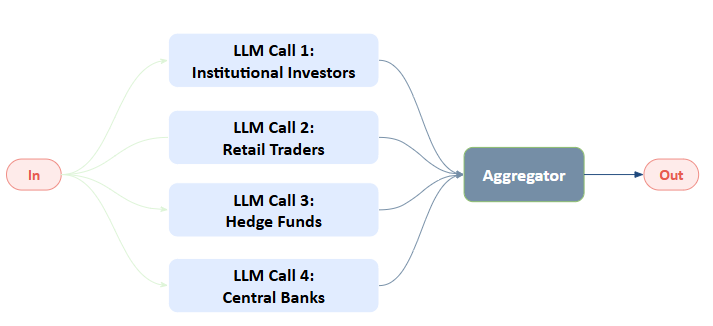

In [12]:
from IPython.display import Image, display
image_path = path+"/Parallelization_workflow_Anthropic.png"
display(Image(filename=image_path))

# Set up and Run the Agentic Parallelization Workflow

In [1]:
%pip install anthropic -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 5.5 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
ANTHROPIC_API_KEY = userdata.get('CLAUDE_API_KEY')

## Specify your LLM

In [3]:
from anthropic import Anthropic
import os
import re

CLIENT = Anthropic(api_key=ANTHROPIC_API_KEY)
# CLIENT = Anthropic(api_key=os.environ["CLAUDE_API_KEY"])

def llm_call(prompt: str, system_prompt: str = "", model="claude-3-5-sonnet-20241022") -> str:
    """
    Calls the model with the given prompt and returns the response.

    Args:
        prompt (str): The user prompt to send to the model.
        system_prompt (str, optional): The system prompt to send to the model. Defaults to "".
        model (str, optional): The model to use for the call. Defaults to "claude-3-5-sonnet-20241022".

    Returns:
        str: The response from the language model.
    """
    messages = [{"role": "user", "content": prompt}]
    response = CLIENT.messages.create(
        model=model,
        max_tokens=4096,
        system=system_prompt,
        messages=messages,
        temperature=0.1,
    )
    return response.content[0].text

## Define the parallel run

In [4]:
from concurrent.futures import ThreadPoolExecutor
from typing import List, Dict, Callable

In [5]:
def parallel(prompt: str, inputs: List[str], n_workers: int = 3) -> List[str]:
    """Process multiple inputs concurrently with the same prompt."""
    with ThreadPoolExecutor(max_workers=n_workers) as executor:
        futures = [executor.submit(llm_call, f"{prompt}\nInput: {x}") for x in inputs]
        return [f.result() for f in futures]

## Define the sub task and main goal and run

In [9]:
%%time
sub_tasks = [
    """Institutional Investors:
    - Portfolio rebalancing strategies
    - Long-term return expectations
    - Sensitivity to macro trends""",

    """Retail Traders:
    - Reactivity to news and sentiment
    - Preference for short-term trades
    - Exposure to volatility""",

    """Hedge Funds:
    - Seek alpha through alternative data
    - High leverage exposure
    - Adaptive trading strategies""",

    """Central Banks:
    - Inflation targeting
    - Monetary policy decisions
    - Currency stability concerns""",
]

prompt_parallel = """Analyze how increased market volatility following geopolitical tension will impact this market actor.
- Include both direct and indirect effects.
- Suggest likely responses or strategic adjustments.
- Structure your response with headers and bullet points for clarity."""

results = parallel(
    prompt_parallel,
    sub_tasks
)

for result in results:
    print(result)
    print("\n")
    print('-- ' * 50)
    print("\n")


Analysis of Market Volatility Impact on Institutional Investors

Direct Effects:
• Portfolio Performance
- Increased short-term volatility in asset values
- Potential deviation from target allocations
- Higher tracking error versus benchmarks
- Possible underperformance in certain asset classes

• Risk Management Challenges
- Higher VaR (Value at Risk) metrics
- Increased hedging costs
- Need for more frequent rebalancing
- Greater correlation between traditionally uncorrelated assets

Indirect Effects:
• Stakeholder Pressure
- Enhanced scrutiny from investment committees
- Questions from beneficiaries about performance
- Pressure to adjust investment strategies
- Potential funding ratio impacts for pension funds

• Operational Considerations
- Higher trading costs due to wider spreads
- Increased demand for risk analytics
- Greater need for frequent stakeholder communication
- Resource strain on research and analysis teams

Likely Strategic Responses:

1. Portfolio Adjustments
• Incre